In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 800)  # dispalys complete text
pd.set_option('float_format', '{:.2f}'.format) # displays float with 2 decimal spaces

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [84]:
np.random.seed(42)
# Read the excel sheet using pandas
bidsData = pd.read_csv('Dataset/cleaned_bids.csv')

# display the 1st 2 rows
bidsData.head(2)

,proj_ID,seq_no,time,estimate,let_date,length,winner,win_amt,num_bids,bid_spread,compiled_bids,county,month
0,NH 1602(247),3001,1000,85290427.93,12/1/2016,0.39,WILLIAMS BROTHERS CONSTRUCTION CO. INC.,73929401.69,7,13677444.11,"PULICE CONSTRUCTION INC. | $83,702,317.31; THE LANE CONSTRUCTION CORPORATION | $84,156,037.80; WILLIAMS BROTHERS CONSTRUCTION CO. INC. | $73,929,401.69; FLATIRON CONSTRUCTORS INC. | $79,922,832.75; WEBBER LLC | $87,606,845.80; ZACHRY CONSTRUCTION CORPORATION | $85,982,411.71; MCCARTHY BUILDING COMPANIES INC. | $86,132,345.12",BEXAR,12
1,NH 2017(364),3005,70,9271227.00,12/1/2016,245.98,LIPHAM ASPHALT AND PAVING COMPANY LLC,8458527.23,4,980483.12,"NORTHEASTERN PAVERS INC. | $8,685,268.42; MISSOURI PETROLEUM PRODUCTS COMPANY LLC | $9,108,664.77; BRANNAN PAVING CO. LTD. | $9,439,010.35; LIPHAM ASPHALT AND PAVING COMPANY LLC | $8,458,527.23",CALLAHAN,12


## Modeling

In [85]:
ss = StandardScaler()

X = bidsData[['time', 'estimate', 'length', 'num_bids']]
y = bidsData['win_amt']

### Test size as 0.5

Train score:  0.9953329514493013 Test Score:  0.9858221539635655
CVV as 5:  [0.99030509 0.99373337 0.97295265 0.98725596 0.98607919]
Mean Square error is : 1871125.0279957845
R^2 score is : 0.9858221539635655
Cross Val score:  0.992232327547673


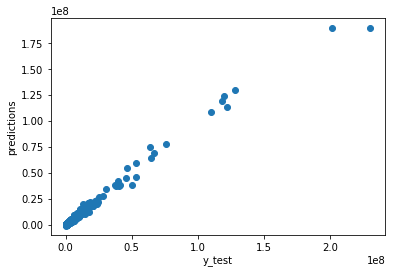

In [86]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

lr = LinearRegression()
lr.fit(X, y)

model = ss.fit_transform(X_train, y_train)
print('Train score: ', lr.score(X_train, y_train), 'Test Score: ', lr.score(X_test, y_test))

#  Plot predictions
predictions = lr.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')

plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(lr, X_test, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print("R^2 score is :", r2_score(y_test, lr.predict(X_test)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')

print("Cross Val score: ", cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())


In [87]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,time,estimate,length,num_bids,Prediction,Actual,Variance
940,84,3526078.05,3.37,4,3287602.68,2807514.44,480088.24
986,280,5208994.70,0.53,6,4968163.98,4253525.11,714638.87
405,120,475030.50,0.01,3,385506.42,455673.00,-70166.58
721,240,1919491.30,0.20,2,1986648.57,1699468.02,287180.55
1610,360,12492719.18,11.44,5,12287179.84,11187471.33,1099708.51


In [88]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.9816068506491046
0.994826536737806
0.9930608256636176


### Test size as 0.3

Train score:  0.9889223591267489 Test Score:  0.9966295233357032
CVV as 5:  [0.99437335 0.98446748 0.99909709 0.99491594 0.99763112]
Mean Square error is : 1074348.4680082316
R^2 score is : 0.9966295233357032
Cross Val score:  0.9889615854995547


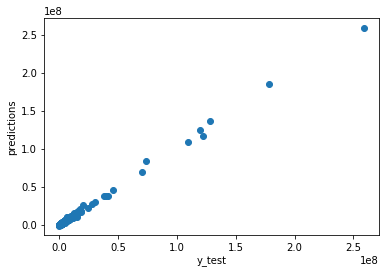

In [89]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(X, y)

model1 = ss.fit_transform(X_train, y_train)
print('Train score: ', lr.score(X_train, y_train), 'Test Score: ', lr.score(X_test, y_test))

#  Plot predictions
predictions = lr.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(LinearRegression(), X_test, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print("R^2 score is :", r2_score(y_test, lr.predict(X_test)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')
print("Cross Val score: ", cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())


In [90]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,time,estimate,length,num_bids,Prediction,Actual,Variance
52,93,532514.13,0.20,6,196340.90,412715.00,-216374.10
679,86,1430045.50,1.26,6,1074906.30,1562281.63,-487375.33
969,548,905020.00,18.69,2,1235483.07,1174127.00,61356.07
1251,120,906325.50,0.01,5,662438.64,827634.40,-165195.76
203,187,2164831.00,16.34,6,1875077.28,1557630.87,317446.41


In [91]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.9816068506491046
0.994826536737806
0.9930608256636176


### Test size as 0.1

Train score:  0.9917019811745394 Test Score:  0.9777796836580558
CVV as 5:  [0.93335838 0.97111859 0.98012849 0.93372302 0.96798755]
Mean Square error is : 1005722.0295159209
R^2 score is : 0.9777796836580558
Cross Val score:  0.9921506914614204


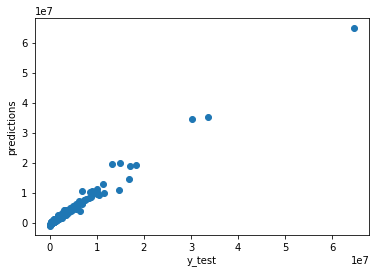

In [92]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

lr = LinearRegression()
lr.fit(X, y)

model1 = ss.fit_transform(X_train, y_train)
print('Train score: ', lr.score(X_train, y_train), 'Test Score: ', lr.score(X_test, y_test))

#  Plot predictions
predictions = lr.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(LinearRegression(), X_test, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print("R^2 score is :", r2_score(y_test, lr.predict(X_test)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')
print("Cross Val score: ", cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())

In [93]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,time,estimate,length,num_bids,Prediction,Actual,Variance
151,541,19851943.94,0.59,12,19188261.99,18405188.99,783073.00
807,165,4572924.25,2.09,1,4612828.98,4467052.10,145776.88
621,102,2753799.70,2.40,8,2244945.02,2680558.94,-435613.92
966,88,4362510.30,135.00,5,3948550.47,3761543.11,187007.36
1202,67,1812752.25,1.54,5,1510226.67,1708497.38,-198270.71


In [94]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.9816068506491046
0.994826536737806
0.9930608256636176
